# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Read the data
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Python Foundations/Project 1 - Foodhub/foodhub_order.csv") ## Fill the blank to read the data
df = pd.read_csv("foodhub_order.csv")
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Use shape to find rxc, but lets print it out neatly
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:

There are 1898 rows and 9 columns in this dataframe.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
We have 4 columns that are objects (strings), 4 int64 (numeric) and 1 float64 (representing $ amount). These datatypes are appropriate for the data they represent.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Check for missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There is no missing data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [67]:
# Get the statistical summary
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,Revenue
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749,3.248842
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637,2.295598
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000,0.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000,1.812000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000,2.121000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000,5.574375
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000,8.852500


#### Observations:
Minimum: 20 mins </br>
Maximum: 35 mins </br>
Average: 27.37 mins


### **Question 5:** How many orders are not rated? [1 mark]

In [19]:
# Use value_counts to determine totals of the different values
#df['rating'].value_counts()

# now that we know 'Not given' = no rating, we could just specifically ask for that total.  alternately we could have looked for unique values and done this also
print("There are", df['rating'].value_counts()['Not given'], "orders with no rating.")

There are 736 orders with no rating.


#### Observations:
There are 736 orders with no rating (of 1898).  This is the largest single value, showing that 38.7% of all orders have no rating.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [68]:
# Lets see how many uniques there are for each
df.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
Revenue                   306
dtype: int64

#Order Id


In [20]:
# How many differnt orders (which SHOULD correspond to rows, but lets check)
df['order_id'].nunique()
# univariate chart doesnt make sense here since this is an identifier

1898

#Restaurants

In [21]:
# how many unique restaurants
df['restaurant_name'].nunique()
# univariate chart seems like it would have too much data to be useful here,
# and its really just a list, more interesting would be vs cuisine or cost or food prep time maybe

178

In [155]:
#might be interesting to see sales by restaurant.  Maybe top 5?
df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).head(5)

restaurant_name
Shake Shack                  3579.53
The Meatball Shop            2145.21
Blue Ribbon Sushi            1903.95
Blue Ribbon Fried Chicken    1662.29
Parm                         1112.76
Name: cost_of_the_order, dtype: float64

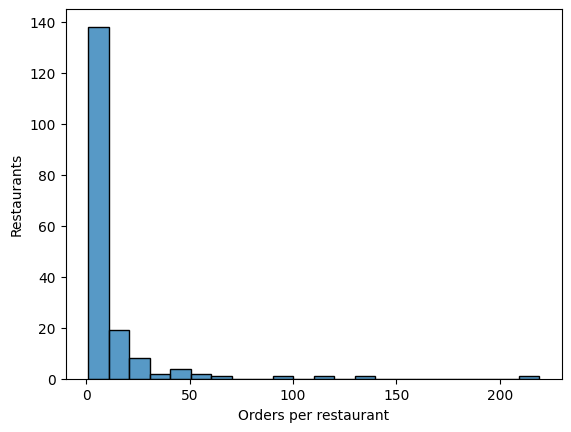

In [158]:
#how about # of orders per restaurant
sns.histplot(df['restaurant_name'].value_counts(),binwidth=10)
plt.ylabel("Restaurants")
plt.xlabel('Orders per restaurant')
plt.show()

The vast majority of restaurants only get <= 10 orders.

#Customers (ID)

In [24]:
# how many unique customers
df['customer_id'].nunique()
# similar to restaurants above

1200

So we have many repeat customers it appears based on 1898 orders and only 1200 customer ids

In [74]:
# top 3 customers by number of orders
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

In [77]:
#How much have the top 3 customers spent?  (added after a later question was asked about top 3).  group then add up values.
#Dont forget to change sort or the wrong answer appears
df.groupby('customer_id')['cost_of_the_order'].sum().sort_values(ascending=False).head(3)

customer_id
52832     225.80
250494    183.83
47440     158.18
Name: cost_of_the_order, dtype: float64

Seems that the top 3 by spend are different than the top 3 by # of orders. Customer 250494 has placed higher $ orders.

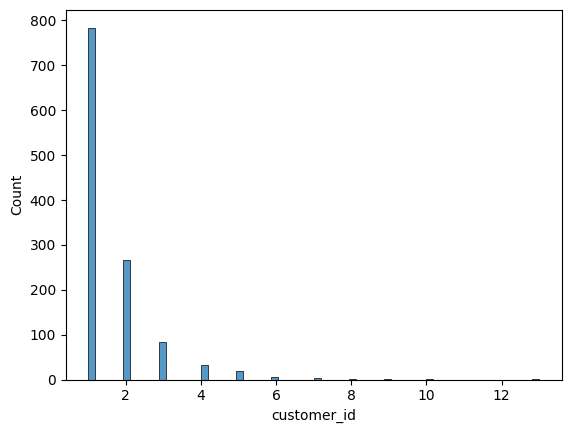

784


In [18]:
# of orders per customer histogram
sns.histplot(df['customer_id'].value_counts())
plt.show()
# num of cutomers placing only 1 order
#print((df.groupby('customer_id')['order_id'].count().sort_values(ascending=False)==1).sum())

Most customers have only placed 1 order.

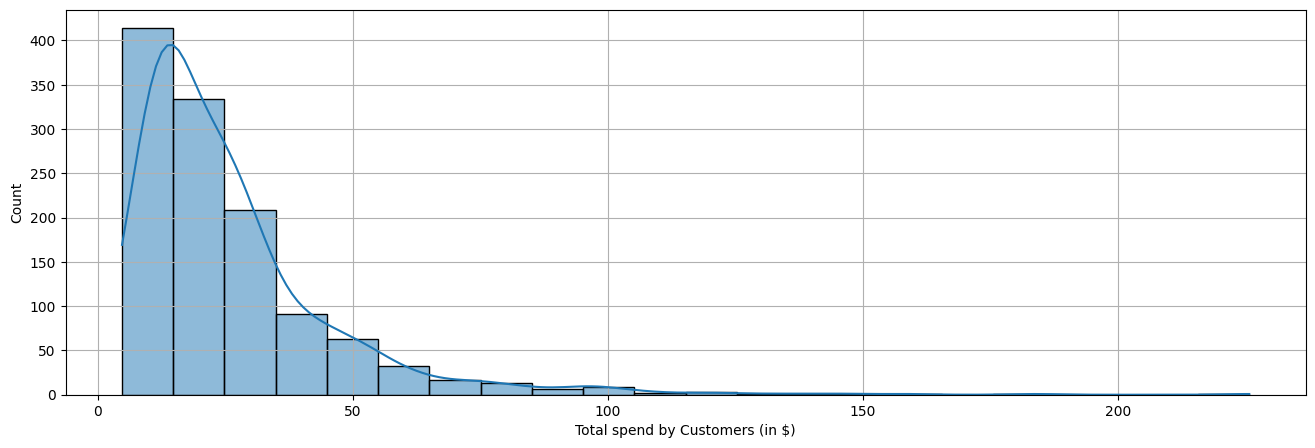

In [144]:
# what is the total spend of customers, and lets use binwidth to simplify
plt.figure(figsize=(16, 5))
plt.xlabel("Total spend by Customers (in $)")
sns.histplot(df.groupby('customer_id')['cost_of_the_order'].sum().sort_values(ascending=False), binwidth=10, kde=True)
plt.grid(True)
plt.show()

#Cuisine

In [22]:
# how many unique cuisines in this data
df['cuisine_type'].nunique()

14

<Axes: xlabel='cuisine_type', ylabel='count'>

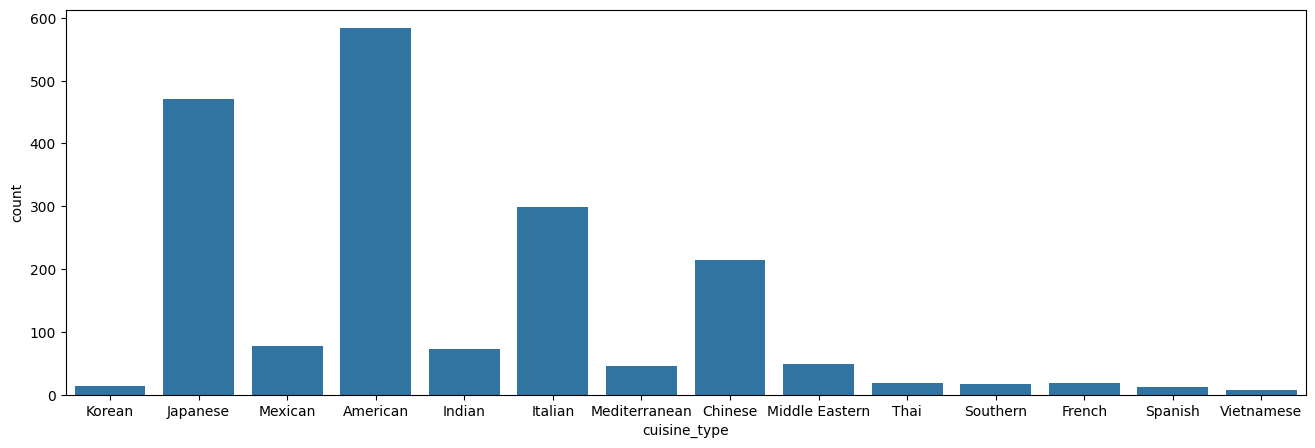

In [29]:
#this might be an interesting chart, orders by cuisine type
plt.figure(figsize = (16,5)) #default too jumbled, spread it out a bit
sns.countplot(data = df, x = 'cuisine_type')

American Cuisine far outnumber the rest, though Japanese isn't too far behind.

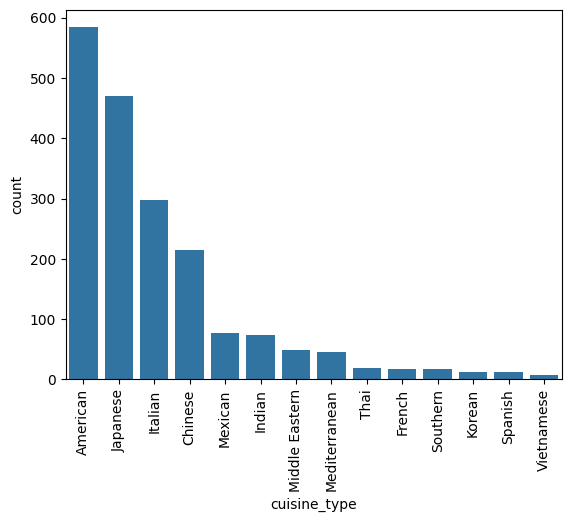

In [112]:
#let's reorder this chart and condense it so its easier to read
# plt.figure(figsize = (16,5)) #default too jumbled, spread it out a bit
sns.countplot(data = df, x = 'cuisine_type', order= df['cuisine_type'].value_counts().index)
plt.tick_params(axis='x', rotation=90)

In [128]:
#can't see the actual counts of American vs Japanes vs whatever, let's get some numbers
print("American cuisine:", df[df.cuisine_type=='American']['order_id'].count())
print("Japanese cuisine:", df[df.cuisine_type=='Japanese']['order_id'].count())
print("Italian cuisine:", df[df.cuisine_type=='Italian']['order_id'].count())

American cuisine: 584
Japanese cuisine: 470
Italian cuisine: 298


#Order cost

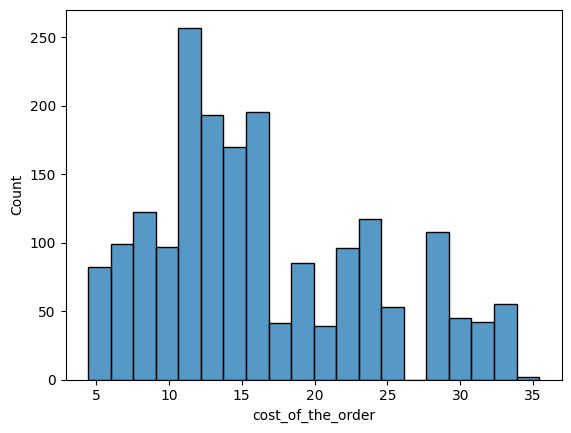

In [172]:
#Lets look at cost histogram
sns.histplot(data=df,x='cost_of_the_order', bins=20)
plt.show()


Right skewed, with costs clustered in the $13-16 range.

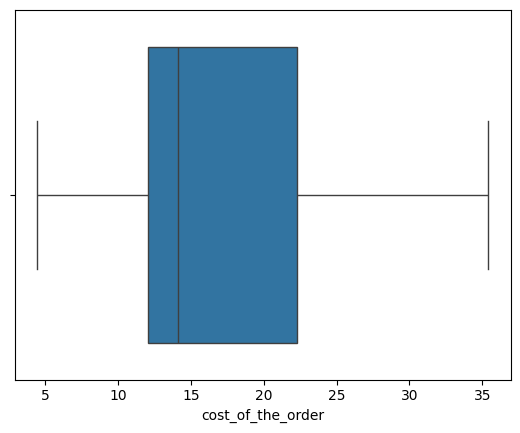

In [31]:
# and maybe a boxplot to see outliers?
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

No outliers outside the 5-35 range. Boxplot narrows the range showing that majority of orders are maybe $12-14

In [147]:
#remind me of the stats of this column
df['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

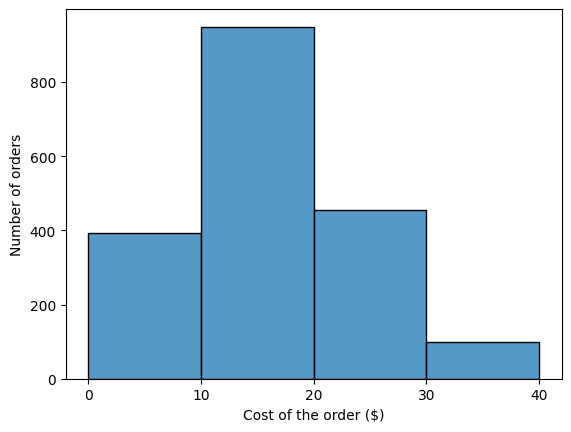

In [145]:
#individual cost per order, max is 35, so lets do it by 10's with max of 40
sns.histplot(data=df, x='cost_of_the_order', binwidth=10, binrange=(0,40))
plt.xlabel('Cost of the order ($)')
plt.ylabel('Number of orders')
plt.xticks([0,10,20,30,40])
plt.show()

In [103]:
#number of orders that cost less than $5
df[df['cost_of_the_order']<5]['order_id'].count()

9

In [152]:
#number of orders that cost less than $10
df[df['cost_of_the_order']<10]['order_id'].count()

394

In [151]:
#number of orders that cost less than $15
df[df['cost_of_the_order']<15]['order_id'].count()

1008

In [150]:
#number of orders that cost less than $20
df[df['cost_of_the_order']<20]['order_id'].count()

1343

In [154]:
# % of orders under $20
round((df[df['cost_of_the_order']<20]['order_id'].count() / df.shape[0]) *100, 2)

70.76

The majority are in the $10-15 range.

#Rating

In [32]:
# how many unique ratings
df['rating'].nunique()

4

4 unique values (which we also know from a question above.

<Axes: xlabel='rating', ylabel='count'>

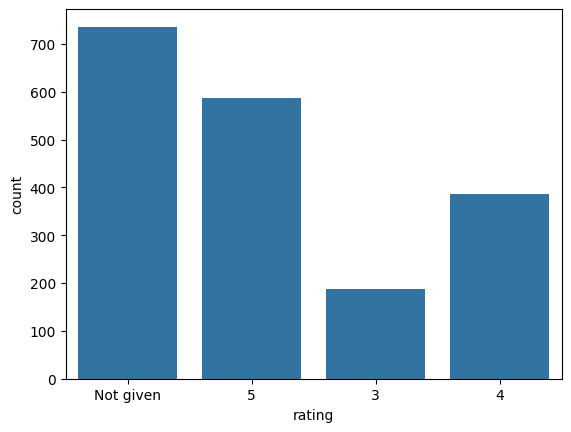

In [33]:
#whats the distribution look like (boxplot doesnt make much sense given only 4 values)
sns.countplot(data = df, x = 'rating')

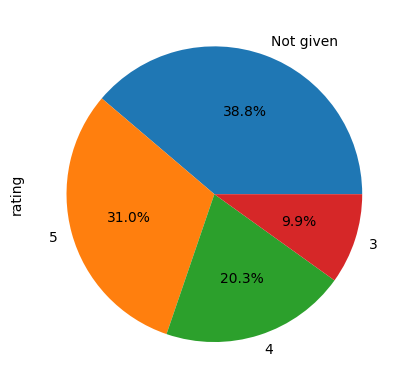

In [8]:
#pie chart
df['rating'].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.show()

#Day of week

In [34]:
df['day_of_the_week'].nunique()

2

<Axes: xlabel='day_of_the_week', ylabel='count'>

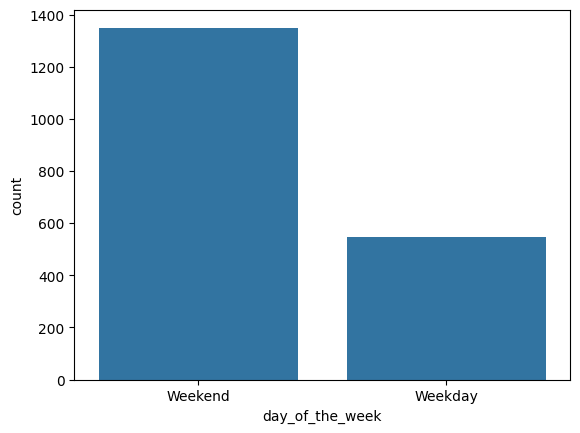

In [35]:
#distribution of the values
sns.countplot(data = df, x = 'day_of_the_week')

Weekend orders more than double weekday, those 2 days represent a lot more businees than the 5 weekdays

In [19]:
# num of orders by day
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

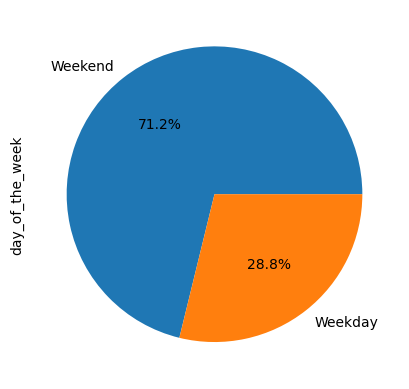

In [7]:
#Pie chart for distribution %
df['day_of_the_week'].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.show()

#Prep time

In [174]:
#remind me of the stats of this column
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

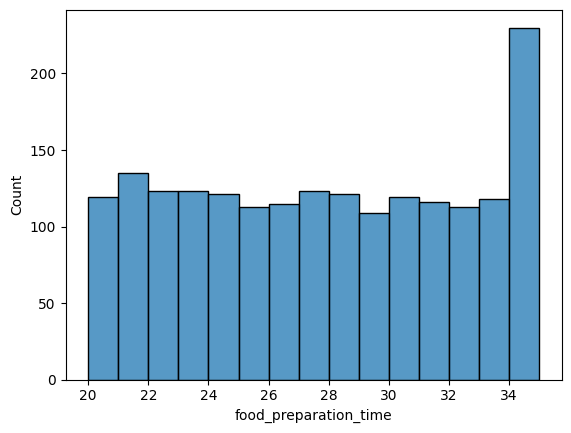

In [173]:
#unique values wont tell us much here. Distribution of times is much more interesting, and maybe lookin at a boxplot to see any outliers
sns.histplot(data=df,x='food_preparation_time', binwidth=1) #so we can see in 1 min increments
plt.show()

pretty evenly distributed with spike around 35 mins.

<Axes: xlabel='food_preparation_time'>

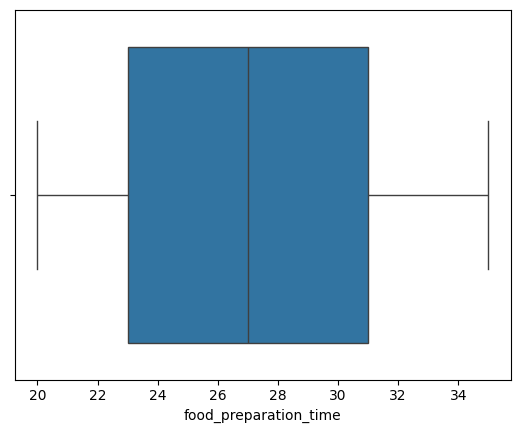

In [38]:
sns.boxplot(data=df,x='food_preparation_time')

Pretty evenly distributed here also with no outliers.

#Delivery

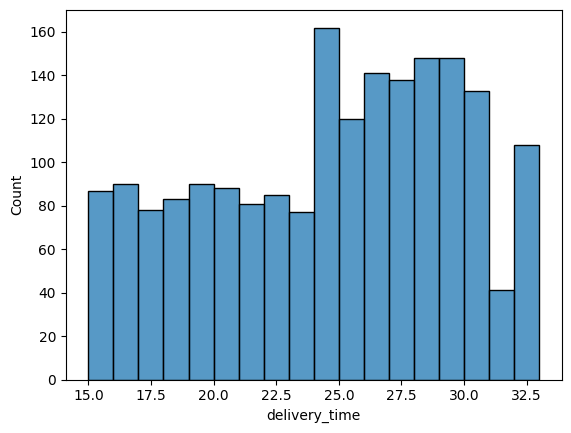

In [175]:
sns.histplot(data=df,x='delivery_time', binwidth=1)
plt.show()

Looks like majority of delivery times clustered around the 24-30 min timeframe

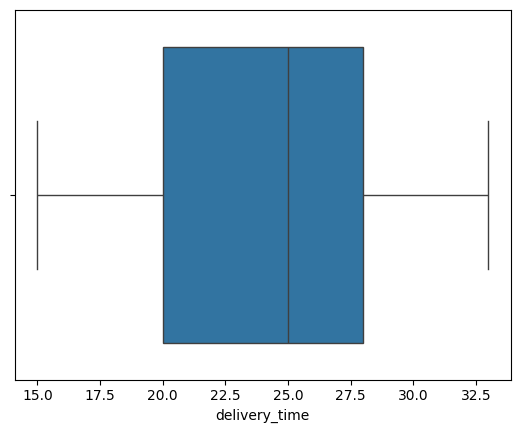

In [40]:
sns.boxplot(data=df,x='delivery_time')
plt.show()

Median looks like about 25.

<br>

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [41]:
#Top 5 by # of orders
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
Shake Shack pretty clear winner here.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [179]:
# most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend'] # we want only orders on weekends
df_weekend['cuisine_type'].value_counts().head(1) #we want the top 1

American    415
Name: cuisine_type, dtype: int64

#### Observations:
American cuisine represents 415 out of 1898 orders, or about 30.7%

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [56]:
# orders that exceed $20, first count the rows that are >20, then divide by number of total rows
percent = (df[df['cost_of_the_order']>20].shape[0] / df.shape[0]) * 100 # we could also consider a new dataframe, but this is easier
#29.24130663856691
#round the display of the value, we could do on line above but gets messy looking. and add % to make it look nice
print("Percent of orders exceeding $20:", round(percent, 2), '%')

Percent of orders exceeding $20: 29.24 %


#### Observations:
Percent of orders exceeding $20: 29.24 %

### **Question 10**: What is the mean order delivery time? [1 mark]

In [60]:
# mean order delivery time, this time I did it the simple way
round(df['delivery_time'].mean(), 2)

24.16

#### Observations:
The mean order delivery time (per df) is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [61]:
# Since we know each row represents a single order, and we know the customer id is used on each of their orders,
# we should only need to count up the different times a customer id appears and get the top 3
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
Customers 52832, 47440, and 83287 should be the customers targeted.<br>
52832 placed 13 orders<br>
47440 placed 10 orders<br>
83287 placed 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


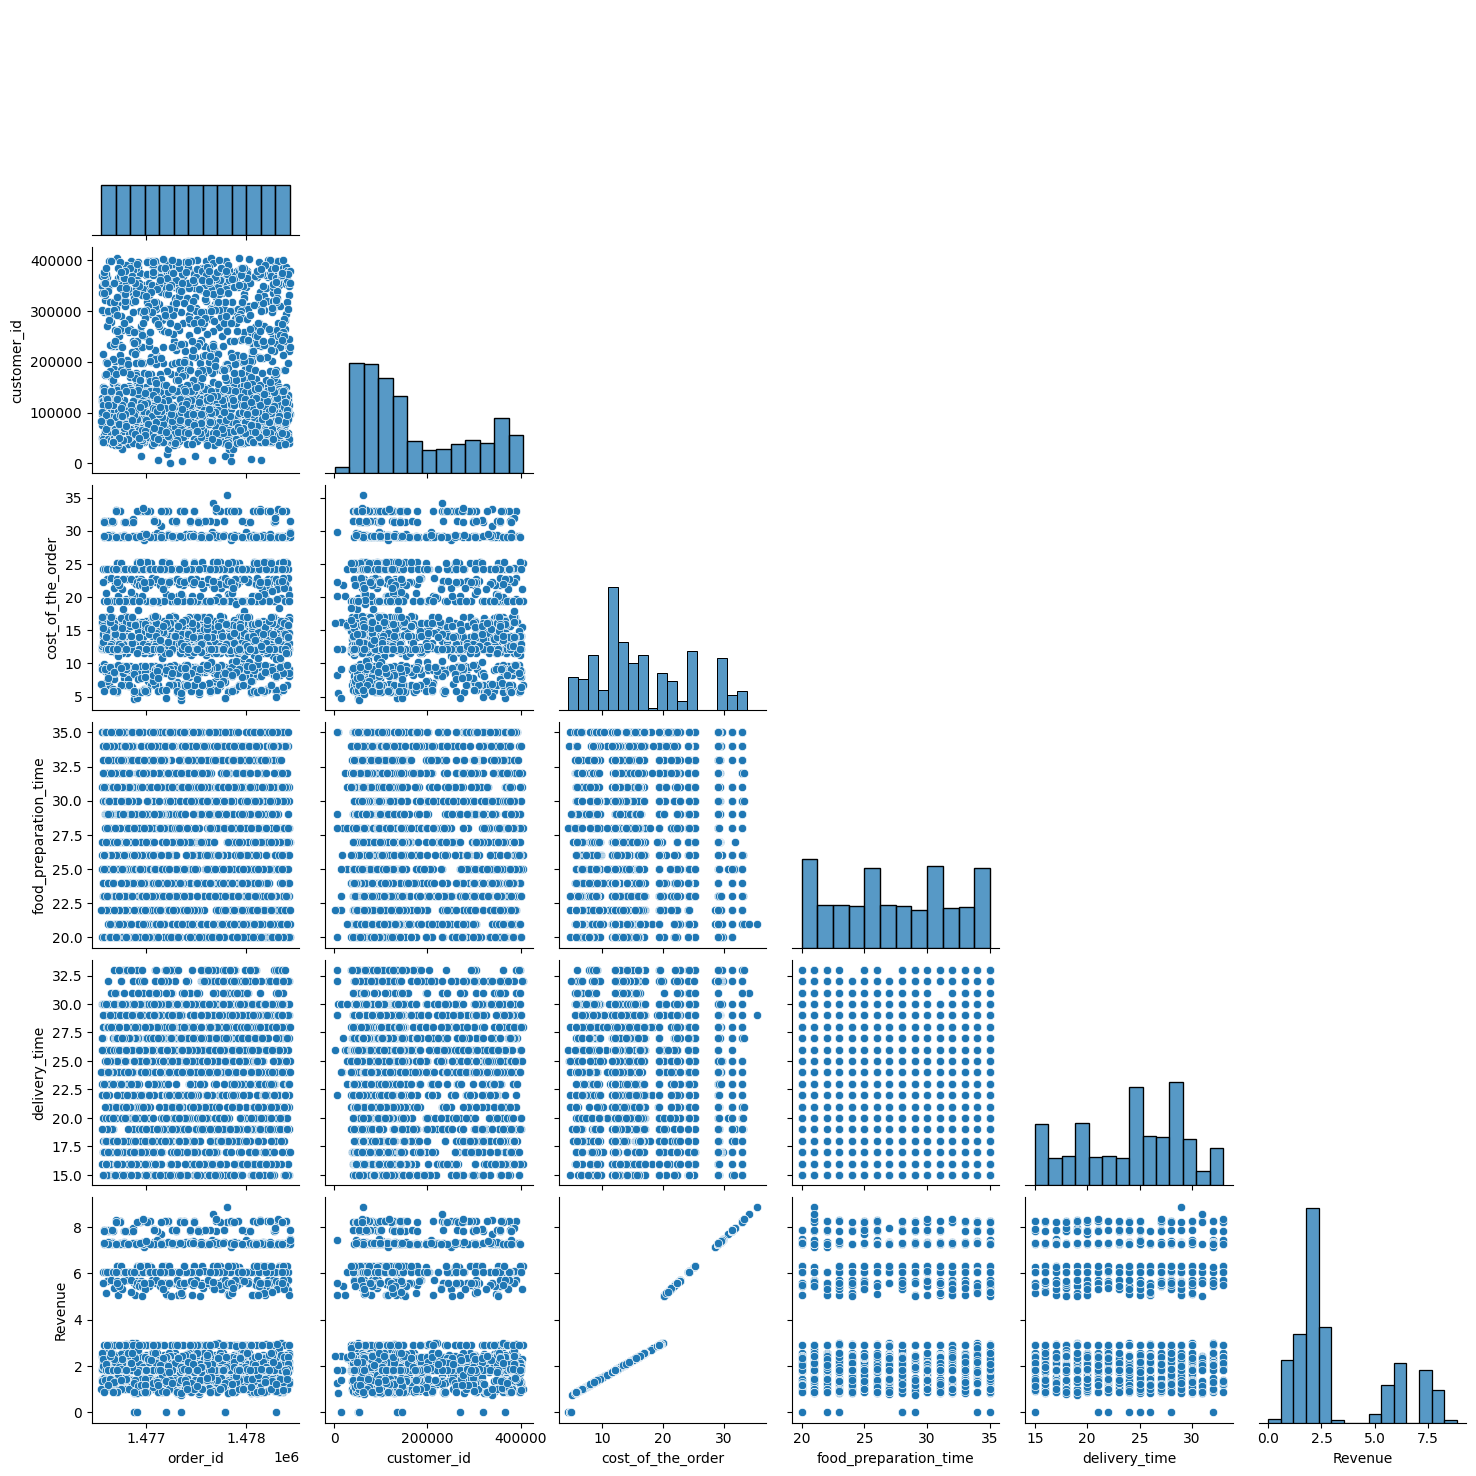

In [246]:
# lets do a pairplot first:
sns.pairplot(data=df, corner= True)
plt.show()

Pairplot doesn't expose any discernable correlations.  Will move on to more specific plots.

#Cost vs

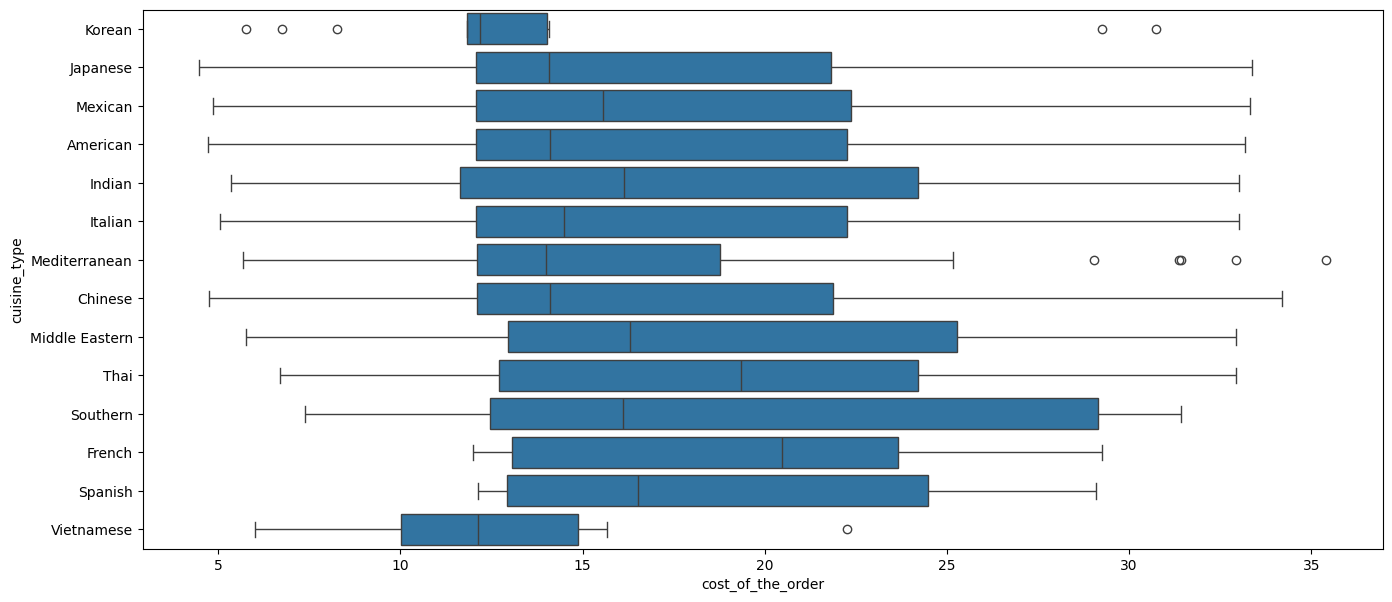

In [212]:
# cost of the order vs cuisine type
plt.figure(figsize=(16,7))
sns.boxplot(x = "cost_of_the_order", y = "cuisine_type", data = df)
plt.show()

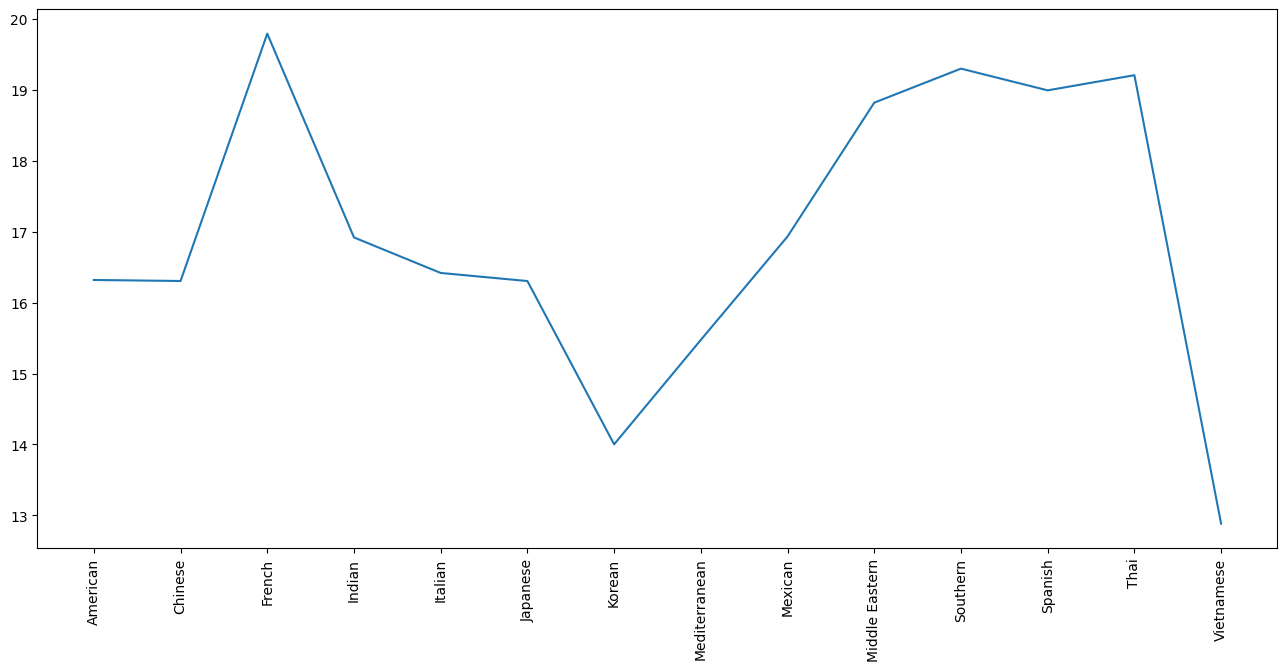

In [211]:
#how about. a line plot of avg price vs cuisine
plt.figure(figsize=(16,7))
avg_cost = df.groupby('cuisine_type')['cost_of_the_order'].mean() #really wanted to just .plot here, but x axis labels didnt want to display all values
plt.plot(avg_cost.index,avg_cost.values)
plt.xticks(rotation = 90)
plt.show()

French cuisine is the most expensive, on average. Vietnamese is the least expensive, on average, and American lands in about the middle.

<Figure size 1600x700 with 0 Axes>

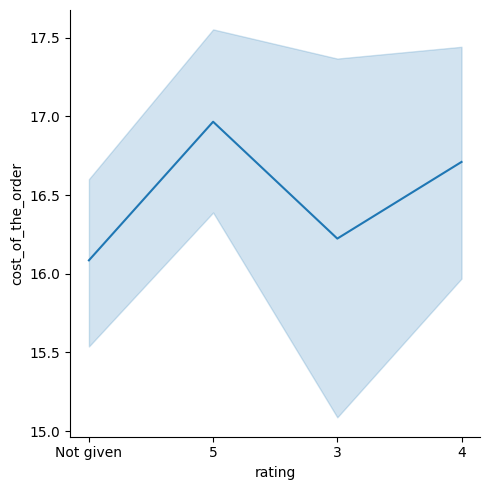

In [20]:
#cost vs rating
plt.figure(figsize=(16, 7))
sns.relplot(x = 'rating', y = 'cost_of_the_order', data = df, kind = "line")
plt.show()

Lower cost items seem to get lower ratings, perhaps due to quality?

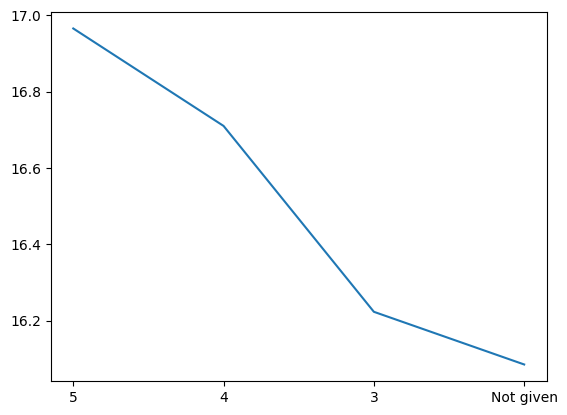

In [105]:
# Cost vs rating
mean_cost_rating = df.groupby('rating')['cost_of_the_order'].mean().reset_index().sort_values(by='cost_of_the_order', ascending=False)

# Plot
plt.plot(mean_cost_rating['rating'], mean_cost_rating['cost_of_the_order'])
plt.show()

Lower cost items seem to get lower ratings, perhaps due to quality?

#Rating vs


<Figure size 1600x700 with 0 Axes>

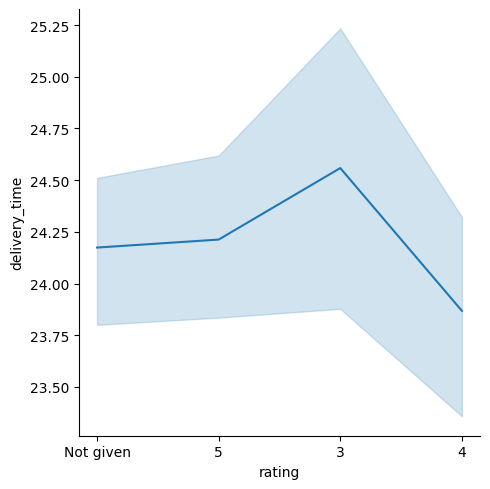

In [21]:
#del vs rating?
plt.figure(figsize=(16, 7))
sns.relplot(x = 'rating', y = 'delivery_time', data = df, kind = "line")
plt.show()

longer wait are rated lower

<Figure size 1600x700 with 0 Axes>

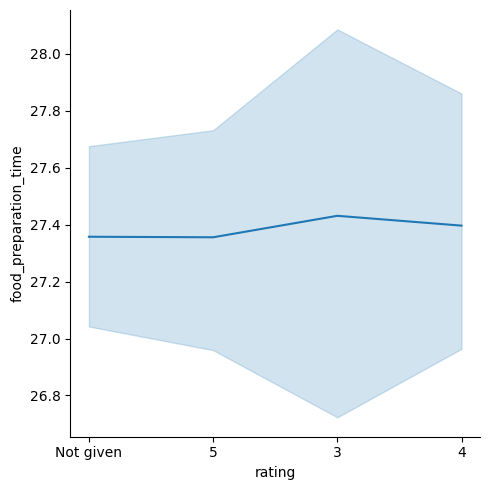

In [22]:
#prep vs rating
plt.figure(figsize=(16, 7))
sns.relplot(x = 'rating', y = 'food_preparation_time', data = df, kind = "line")
plt.show()

longer wait are rated lower

<Figure size 1600x700 with 0 Axes>

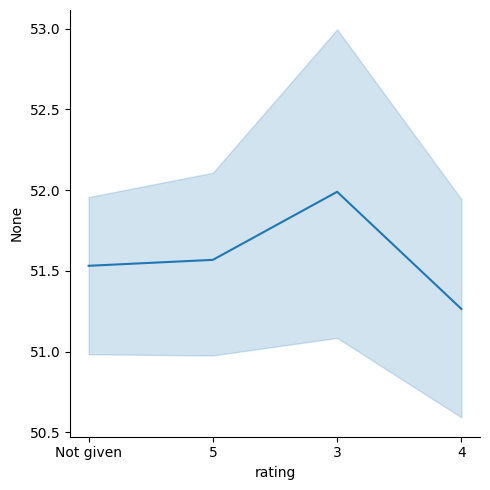

In [23]:
#total time vs rating
plt.figure(figsize=(16, 7))
sns.relplot(x = 'rating', y = df['food_preparation_time'] + df['delivery_time'], data = df, kind = "line")
plt.show()

longer wait are rated lower

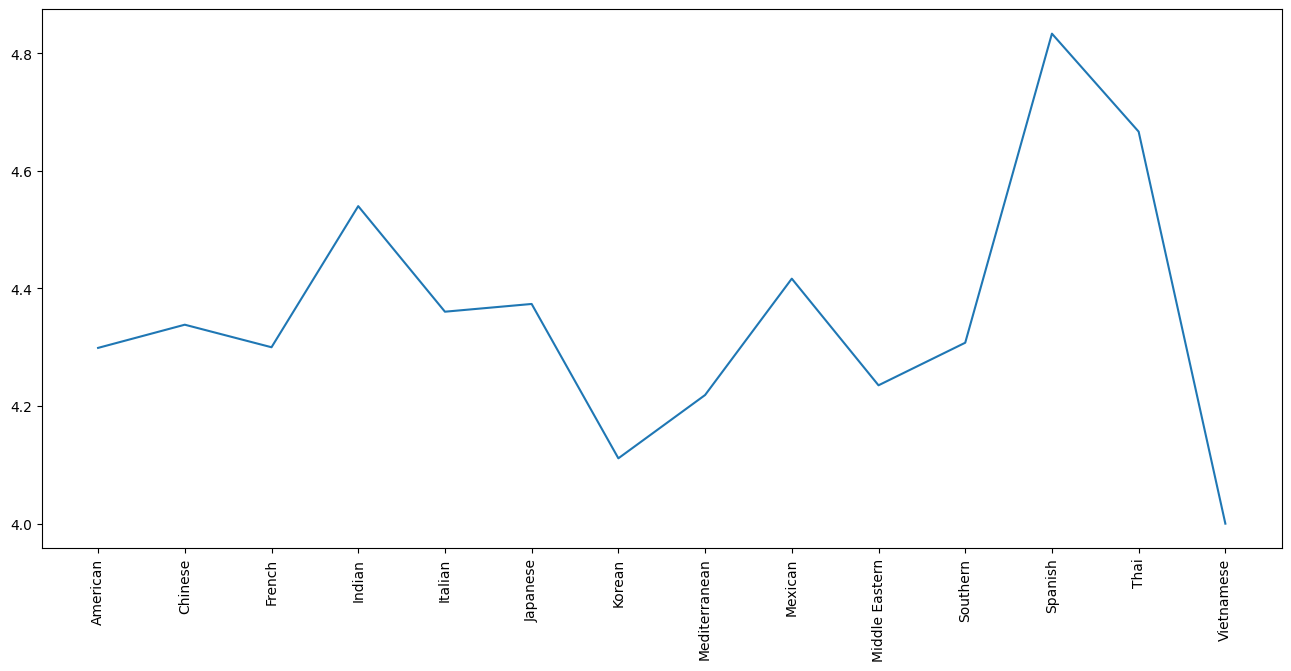

In [33]:
#cuisine vs avg rating
# lets convert rating to numeric
df_ratings = df[df['rating'] != 'Not given'].copy() # dont copy the not givens
df_ratings['rating']=pd.to_numeric(df_ratings['rating']) # now make the column numeric

plt.figure(figsize=(16,7))
avg_rating = df_ratings.groupby('cuisine_type')['rating'].mean() #really wanted to just .plot here, but x axis labels didnt want to display all values
plt.plot(avg_rating.index,avg_rating.values)
plt.xticks(rotation = 90)
plt.show()

#Heatmaps

<ipython-input-26-69af67fca861>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

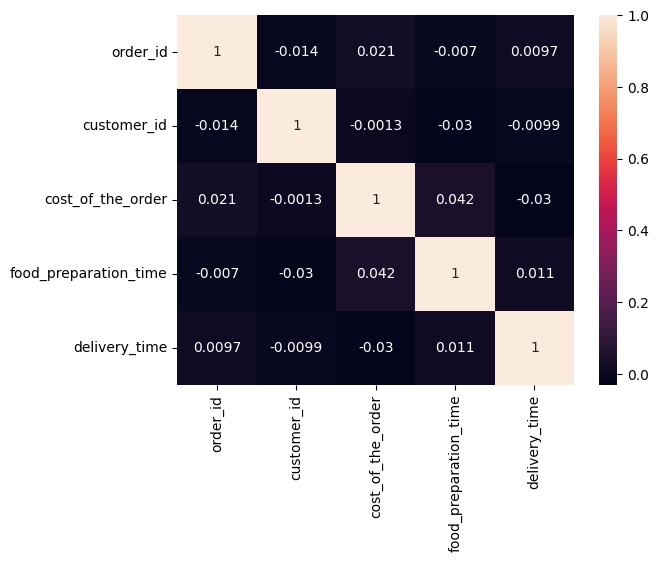

In [26]:
#Lets do a heatmap
sns.heatmap(df.corr(), annot=True)

<ipython-input-28-155ea3893f44>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ratings.corr()[['rating']].sort_values(by='rating', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


<Axes: >

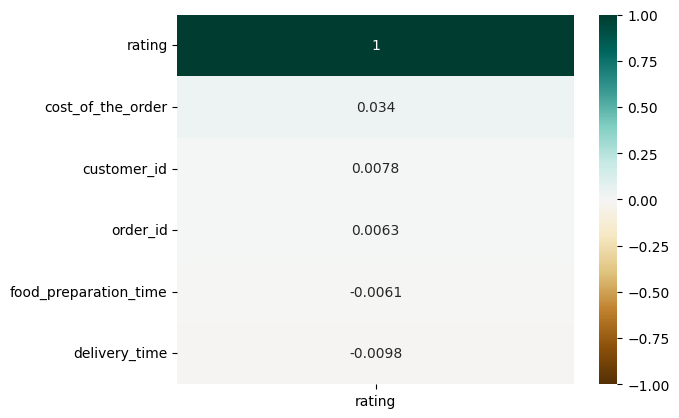

In [28]:
#lets try it with rating
#here we need to do some work on ratings so lets recreate the df without the not givens
df_ratings = df[df['rating'] != 'Not given'].copy() # dont copy the not givens
df_ratings['rating']=pd.to_numeric(df_ratings['rating']) # now make the column numeric, should be int, though we could use as_type to force it
sns.heatmap(df_ratings.corr()[['rating']].sort_values(by='rating', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

Still not much correlation here between values

#Day vs

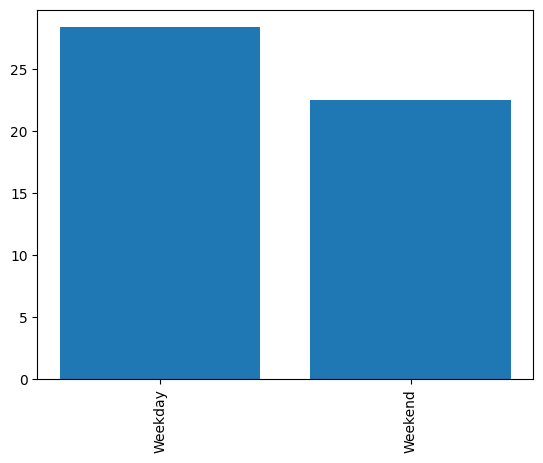

In [6]:
# Get the mean delivery time grouped by day of week
mean_del_time = df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()

# Plot
plt.bar(mean_del_time['day_of_the_week'], mean_del_time['delivery_time'])
plt.xticks(rotation=90)
plt.show()

Delivery time is longer on the weekdays.

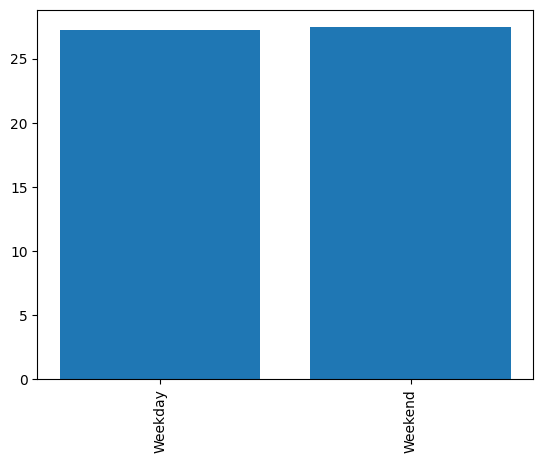

In [8]:
# Get the mean prep time grouped by day of week
mean_prep_time = df.groupby('day_of_the_week')['food_preparation_time'].mean().reset_index()

# Plot
plt.bar(mean_prep_time['day_of_the_week'], mean_prep_time['food_preparation_time'])
plt.xticks(rotation=90)
plt.show()

Prep time is consistent across days.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [77]:
#here we need to do some work on ratings so lets recreate the df without the not givens
df_ratings = df[df['rating'] != 'Not given'].copy() # dont copy the not givens
df_ratings['rating']=pd.to_numeric(df_ratings['rating']) # now make the column numeric, should be int, though we could use as_type to force it

#What restaurants have > 50 reviews
# create another dataframe grouping restaurant with ratings so we can start filtering more
df_ratings_rest = df_ratings.groupby(['restaurant_name'])['rating'].count().reset_index() #reset the index or the next command fails
#get the names
rest_50 = df_ratings_rest[df_ratings_rest['rating']>50]['restaurant_name']

#we have the names, now we need to filter the original dataset we created. Don't apply to other or you cant get ratings
#need to eliminate restaurants that dont have 50 reviews (above). Actually easier to copy what we want to new dataframe than to delete based on isin
final_list = df_ratings[df_ratings['restaurant_name'].isin(rest_50)].copy()
#final_list.head()

#ok, now we can finally figure this out. we should be able to group again and find the mean, then order from high to low
final_list.groupby('restaurant_name')['rating'].mean().sort_values(ascending = False)

restaurant_name
The Meatball Shop            4.511905
Blue Ribbon Fried Chicken    4.328125
Shake Shack                  4.278195
Blue Ribbon Sushi            4.219178
Name: rating, dtype: float64

In [79]:
avg_4 = df_ratings.groupby(['restaurant_name'])['rating'].mean().reset_index()
print(avg_4[avg_4['rating']>=4].count()) #how many

restaurant_name    139
rating             139
dtype: int64


#### Observations:
The restaurants that qualify are The Meatball Shop, Shake Shack, Blue Ribbon Fried Chicken, and Blue Ribbon Sushi <br>
Only 4 restaurants with more than 50 ratings!<br>
139 restaurants with mean >= 4



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [101]:
#filter orders that cost > $20
df_20 = df[df['cost_of_the_order']>20]
#now figure out the revenue for this segment using filtered data
rev_25 = df_20['cost_of_the_order'].sum() * .25
#print(rev_25)

#now do the same for orders >5 - there are some so we need to make sure to filter correctly
df_5 = df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]
rev_15 = df_5['cost_of_the_order'].sum() * .15
#print(rev_15)

print('The net revenue is $',round(rev_25 + rev_15, 2))


The net revenue is $ 6166.3


In [91]:
df[df['cost_of_the_order']<=5] #dont count these

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
82,1477790,133617,Shake Shack,American,4.75,Weekday,4,35,28
390,1477196,50123,Cafe Habana,Mexican,4.85,Weekend,5,28,22
480,1476877,53289,The Loop,Japanese,4.66,Weekend,Not given,34,25
542,1477788,270444,P.J. Clarke's,American,4.71,Weekend,Not given,23,15
624,1477349,52327,Nobu Next Door,Japanese,4.47,Weekend,5,28,26
664,1476909,366975,Blue Ribbon Sushi Bar & Grill,Japanese,4.85,Weekend,5,20,21
889,1477787,14869,Shake Shack,American,4.80,Weekend,4,22,24
1569,1477786,145389,RedFarm Hudson,Chinese,4.75,Weekend,3,23,25
1695,1478302,318665,Blue Ribbon Sushi Bar & Grill,Japanese,4.90,Weekday,4,29,32


#### Observations:
The net revenue is $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [178]:
#add prep and delivery time, filter by >60 mins, divide by total rows and then do the % calc and round
round( ((df[(df['food_preparation_time'] + df['delivery_time'])>60].shape[0] / df.shape[0]) *100), 2)

10.54

#### Observations:
200 orders exceed 60 minutes, representing 10.54% of all orders.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [102]:
# Lets get the mean delivery times
print('Weekdays:', round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'mins and Weekends:', round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()), 'mins')

Weekdays: 28 mins and Weekends: 22 mins


#### Observations:
About 28 minutes on weekdays and 22 minutes on weekends.<br>
About 6 mins difference between weekdays and weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The majority of customers have only placed 1 order (784 of 1898)
*  The majority of orders are placed on the weekends (1351 of 1898)
*  A large percentage of orders were not rated (736 of 1898, 38.7%)
*  The most popular restaurant is Shake Shack, representing 11.5% of all orders in this dataset.
*  The most popular cuisine is American, representing 30.8% of orders in this dataset.
*  Delivery times are about 6 minutes longer on Weekdays.
*  Food Preperation times are consistent throughout the week.
*  Cost of the order has more impact on rating than wait time.



### Recommendations:

*  Some effort should be put into determining why so many customers only ordered once, and why so many orders were not rated. Perhaps some sort of coupon could be offered to individuals to rate and/or order again.
* Several cuisine categories are not ordered from frequently. A partnership or focus on these cuisine types may draw more orders in those segments.
* Alternately, partnerships and spotlights on the most popular restaurants may drive sales. Some experimentaion should be explored.
* Some effort should be made to reduce delivery times on weekdays. Perhaps there is a need for more delivery drivers.
* Since revenue is 10% higher on orders exceeding $20, promoting additonal items to add to an order to raise the total cost would be a worthwhile investment.

---